In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("students_dataset.csv")

# View the first few rows
print(df.head())


   code_module  code_presentation  id_student  gender  region  \
0            1                  0       36447       1       1   
1            0                  2       82449       0       8   
2            1                  2       50428       0       9   
3            1                  0       61471       1      11   
4            1                  1       19500       0       4   

   highest_education  imd_band  age_band  num_of_prev_attempts  \
0                  1        10         2                     4   
1                  0         3         1                     1   
2                  4         6         2                     1   
3                  2        10         2                     3   
4                  1         4         2                     4   

   studied_credits  disability  final_result  
0            105.0           1             1  
1            325.0           0             1  
2            160.0           0             0  
3            210.0      

In [2]:
print(df.columns)


Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result'],
      dtype='object')


In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode all categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Features and label
X = df.drop(['id_student', 'final_result'], axis=1)  # Drop ID column
y = df['final_result']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Random Forest Accuracy: 57.0 %
              precision    recall  f1-score   support

           0       0.27      0.09      0.13       351
           1       0.60      0.90      0.72       726
           2       0.00      0.00      0.00       123

    accuracy                           0.57      1200
   macro avg       0.29      0.33      0.29      1200
weighted avg       0.44      0.57      0.48      1200



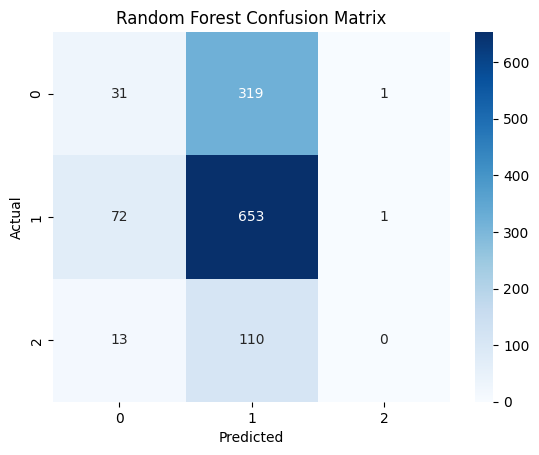

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Accuracy
print("Random Forest Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Use original unbalanced data
X_orig = df.drop(['id_student', 'final_result'], axis=1)
y_orig = df['final_result']

# Split
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_orig, y_orig, test_size=0.2, random_state=42)

# Train Gradient Boosting
gb_orig = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=4, random_state=42)
gb_orig.fit(X_train_orig, y_train_orig)
y_pred_orig = gb_orig.predict(X_test_orig)

# Evaluate
print("Gradient Boosting Accuracy (Before SMOTE-ENN):", round(accuracy_score(y_test_orig, y_pred_orig) * 100, 2), "%")
print(classification_report(y_test_orig, y_pred_orig))


Gradient Boosting Accuracy (Before SMOTE-ENN): 57.33 %
              precision    recall  f1-score   support

           0       0.22      0.06      0.09       351
           1       0.60      0.92      0.73       726
           2       0.00      0.00      0.00       123

    accuracy                           0.57      1200
   macro avg       0.27      0.33      0.27      1200
weighted avg       0.43      0.57      0.47      1200



In [6]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Train SVM on the original imbalanced data
svm_model = SVC(kernel='rbf', C=1, gamma='scale')  # You can also try 'linear' or 'poly'
svm_model.fit(X_train_orig, y_train_orig)

# Predict
y_pred_svm = svm_model.predict(X_test_orig)

# Evaluate
print("SVM Accuracy (Before SMOTE-ENN):", round(accuracy_score(y_test_orig, y_pred_svm) * 100, 2), "%")
print(classification_report(y_test_orig, y_pred_svm))


SVM Accuracy (Before SMOTE-ENN): 60.5 %
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       351
           1       0.60      1.00      0.75       726
           2       0.00      0.00      0.00       123

    accuracy                           0.60      1200
   macro avg       0.20      0.33      0.25      1200
weighted avg       0.37      0.60      0.46      1200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
from xgboost import XGBClassifier

# Re-split original (unbalanced) data
X_orig = df.drop(['id_student', 'final_result'], axis=1)
y_orig = df['final_result']
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_orig, y_orig, test_size=0.2, random_state=42)

# Train XGBoost
xgb_orig = XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=4, random_state=42)
xgb_orig.fit(X_train_orig, y_train_orig)
y_pred_orig = xgb_orig.predict(X_test_orig)

# Accuracy
print("XGBoost Accuracy (Before SMOTE-ENN):", round(accuracy_score(y_test_orig, y_pred_orig) * 100, 2), "%")
print(classification_report(y_test_orig, y_pred_orig))


XGBoost Accuracy (Before SMOTE-ENN): 58.5 %
              precision    recall  f1-score   support

           0       0.23      0.04      0.07       351
           1       0.60      0.95      0.74       726
           2       0.00      0.00      0.00       123

    accuracy                           0.58      1200
   macro avg       0.28      0.33      0.27      1200
weighted avg       0.43      0.58      0.47      1200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
from imblearn.combine import SMOTEENN
from collections import Counter

# Apply SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

print("Before resampling:", Counter(y))
print("After resampling:", Counter(y_resampled))

# Split again
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


Before resampling: Counter({1: 3637, 0: 1764, 2: 599})
After resampling: Counter({2: 3172, 0: 1749, 1: 458})


In [9]:
# Train SVM after resampling
svm_model_resampled = SVC(kernel='rbf', C=1, gamma='scale')
svm_model_resampled.fit(X_resampled, y_resampled)

# Predict
y_pred_svm_resampled = svm_model_resampled.predict(X_test_orig)

# Evaluate
print("SVM Accuracy (After SMOTE-ENN):", round(accuracy_score(y_test_orig, y_pred_svm_resampled) * 100, 2), "%")
print(classification_report(y_test_orig, y_pred_svm_resampled))


SVM Accuracy (After SMOTE-ENN): 10.25 %
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       351
           1       0.00      0.00      0.00       726
           2       0.10      1.00      0.19       123

    accuracy                           0.10      1200
   macro avg       0.03      0.33      0.06      1200
weighted avg       0.01      0.10      0.02      1200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
# Train-test split from resampled data
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train XGBoost
xgb_sm = XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=4, random_state=42)
xgb_sm.fit(X_train_sm, y_train_sm)
y_pred_sm = xgb_sm.predict(X_test_sm)

# Accuracy
print("XGBoost Accuracy (After SMOTE-ENN):", round(accuracy_score(y_test_sm, y_pred_sm) * 100, 2), "%")
print(classification_report(y_test_sm, y_pred_sm))


XGBoost Accuracy (After SMOTE-ENN): 72.77 %
              precision    recall  f1-score   support

           0       0.74      0.52      0.61       375
           1       0.48      0.27      0.34        93
           2       0.74      0.93      0.82       608

    accuracy                           0.73      1076
   macro avg       0.65      0.57      0.59      1076
weighted avg       0.72      0.73      0.71      1076



In [11]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print(classification_report(y_test, y_pred))


Accuracy: 80.02 %
              precision    recall  f1-score   support

           0       0.81      0.69      0.75       375
           1       0.50      0.19      0.28        93
           2       0.81      0.96      0.88       608

    accuracy                           0.80      1076
   macro avg       0.71      0.62      0.63      1076
weighted avg       0.78      0.80      0.78      1076



In [12]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Accuracy:", round(accuracy_score(y_test, y_pred_gb) * 100, 2), "%")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 77.6 %
              precision    recall  f1-score   support

           0       0.81      0.62      0.70       375
           1       0.54      0.35      0.43        93
           2       0.78      0.94      0.85       608

    accuracy                           0.78      1076
   macro avg       0.71      0.64      0.66      1076
weighted avg       0.77      0.78      0.76      1076



In [13]:
!pip install xgboost


In [14]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", round(accuracy_score(y_test, y_pred_xgb) * 100, 2), "%")
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:17:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 75.28 %
              precision    recall  f1-score   support

           0       0.78      0.57      0.66       375
           1       0.55      0.33      0.42        93
           2       0.76      0.93      0.84       608

    accuracy                           0.75      1076
   macro avg       0.70      0.61      0.64      1076
weighted avg       0.75      0.75      0.74      1076



In [15]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create pipeline with scaling + SVM
svm_model = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=10, gamma=0.01))

# Train and predict
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluate
print("SVM Accuracy:", round(accuracy_score(y_test, y_pred_svm) * 100, 2), "%")
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 59.01 %
              precision    recall  f1-score   support

           0       0.51      0.17      0.25       375
           1       0.00      0.00      0.00        93
           2       0.60      0.94      0.73       608

    accuracy                           0.59      1076
   macro avg       0.37      0.37      0.33      1076
weighted avg       0.52      0.59      0.50      1076



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
from imblearn.combine import SMOTEENN
from collections import Counter

# Apply SMOTE-ENN
smote_enn = SMOTEENN(random_state=42)
X_res, y_res = smote_enn.fit_resample(X, y)

# Check new class balance
print("After resampling:", Counter(y_res))


After resampling: Counter({2: 3172, 0: 1749, 1: 458})


In [17]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Encode labels to one-hot
le = LabelEncoder()
y_encoded = le.fit_transform(y_res)
y_categorical = to_categorical(y_encoded)

# Reshape features for LSTM input (samples, timesteps, features)
X_reshaped = np.array(X_res).reshape(X_res.shape[0], 1, X_res.shape[1])

# Train/test split
from sklearn.model_selection import train_test_split
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_reshaped, y_categorical, test_size=0.2, random_state=42)


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [19]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(1, X_res.shape[1]), return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_categorical.shape[1], activation='softmax'))  # Output layer for 3 classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_dl, y_train_dl, epochs=30, batch_size=64, validation_data=(X_test_dl, y_test_dl))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.3960 - loss: 1.1163 - val_accuracy: 0.5651 - val_loss: 0.9024
Epoch 2/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5898 - loss: 0.9033 - val_accuracy: 0.5651 - val_loss: 0.8991
Epoch 3/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5984 - loss: 0.8857 - val_accuracy: 0.5651 - val_loss: 0.8996
Epoch 4/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6030 - loss: 0.8748 - val_accuracy: 0.5651 - val_loss: 0.8968
Epoch 5/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5979 - loss: 0.8779 - val_accuracy: 0.5651 - val_loss: 0.8938
Epoch 6/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5925 - loss: 0.8764 - val_accuracy: 0.5660 - val_loss: 0.8906
Epoch 7/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5906 - loss: 0.8701 - val_accuracy: 0.5678 - val_loss: 0.8878
Epoch 8/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5956 - loss: 0.8636 - val_accuracy: 0.5669 - va

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict
y_pred_probs = model.predict(X_test_dl)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_dl, axis=1)

# Classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred))

# Confusion matrix
print("Confusion Matrix:\n")
print(confusion_matrix(y_true, y_pred))


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.49      0.22      0.30       375
           1       0.18      0.02      0.04        93
           2       0.62      0.91      0.74       608

    accuracy                           0.59      1076
   macro avg       0.43      0.38      0.36      1076
weighted avg       0.54      0.59      0.53      1076

Confusion Matrix:

[[ 82   7 286]
 [ 37   2  54]
 [ 50   2 556]]


In [21]:
from tensorflow.keras.layers import Bidirectional

# Build BiLSTM model
model_bilstm = Sequential()
model_bilstm.add(Bidirectional(LSTM(64, return_sequences=False), input_shape=(1, X_res.shape[1])))
model_bilstm.add(Dropout(0.3))
model_bilstm.add(Dense(32, activation='relu'))
model_bilstm.add(Dense(y_categorical.shape[1], activation='softmax'))

# Compile model
model_bilstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train
history_bilstm = model_bilstm.fit(X_train_dl, y_train_dl, epochs=30, batch_size=64, validation_data=(X_test_dl, y_test_dl))


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.4943 - loss: 0.9973 - val_accuracy: 0.5651 - val_loss: 0.9083
Epoch 2/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5921 - loss: 0.9024 - val_accuracy: 0.5651 - val_loss: 0.9010
Epoch 3/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5875 - loss: 0.8935 - val_accuracy: 0.5651 - val_loss: 0.8983
Epoch 4/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5963 - loss: 0.8768 - val_accuracy: 0.5651 - val_loss: 0.8967
Epoch 5/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6011 - loss: 0.8664 - val_accuracy: 0.5651 - val_loss: 0.8997
Epoch 6/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5889 - loss: 0.8790 - val_accuracy: 0.5660 - val_loss: 0.8918
Epoch 7/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5936 - loss: 0.8796 - val_accuracy: 0.5669 - val_loss: 0.8869
Epoch 8/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6005 - loss: 0.8635 - val_accuracy: 0.5706 - val_loss: 0.8825


In [22]:
# Predict
y_pred_probs_bi = model_bilstm.predict(X_test_dl)
y_pred_bi = np.argmax(y_pred_probs_bi, axis=1)
y_true_bi = np.argmax(y_test_dl, axis=1)

# Classification report
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n")
print(classification_report(y_true_bi, y_pred_bi))

print("Confusion Matrix:\n")
print(confusion_matrix(y_true_bi, y_pred_bi))


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.52      0.08      0.14       375
           1       0.42      0.05      0.10        93
           2       0.59      0.97      0.73       608

    accuracy                           0.58      1076
   macro avg       0.51      0.37      0.32      1076
weighted avg       0.55      0.58      0.47      1076

Confusion Matrix:

[[ 30   6 339]
 [ 12   5  76]
 [ 16   1 591]]


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(LSTM(64, input_shape=(X_train_dl.shape[1], X_train_dl.shape[2])))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train_dl.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

history = model.fit(
    X_train_dl, y_train_dl,
    epochs=30,
    batch_size=32,
    validation_data=(X_test_dl, y_test_dl),
    verbose=1
)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5085 - loss: 0.9894 - val_accuracy: 0.5651 - val_loss: 0.9010
Epoch 2/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5908 - loss: 0.9063 - val_accuracy: 0.5651 - val_loss: 0.9007
Epoch 3/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5989 - loss: 0.8915 - val_accuracy: 0.5651 - val_loss: 0.8992
Epoch 4/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5954 - loss: 0.8864 - val_accuracy: 0.5651 - val_loss: 0.8958
Epoch 5/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5811 - loss: 0.8915 - val_accuracy: 0.5651 - val_loss: 0.8986
Epoch 6/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5947 - loss: 0.8731 - val_accuracy: 0.5651 - val_loss: 0.8941
Epoch 7/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5951 - loss: 0.8642 - val_accuracy: 0.5669 - val_loss: 0.8876
Epoch 8/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5928 - loss: 0.8805 - val_accuracy: 0.5651 - val_

In [28]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [25]:
X_train_dl = X_train_dl.reshape(X_train_dl.shape[0], 5, 2)  # or (10, 1) depending on what makes sense
X_test_dl = X_test_dl.reshape(X_test_dl.shape[0], 5, 2)


In [26]:
from keras.layers import Dropout

model = Sequential()
model.add(LSTM(64, input_shape=(X_train_dl.shape[1], X_train_dl.shape[2]), return_sequences=False))
model.add(Dropout(0.5))  # Add this
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train_dl.shape[1], activation='softmax'))


In [27]:
from keras.layers import Bidirectional

model = Sequential()
model.add(Bidirectional(LSTM(64), input_shape=(X_train_dl.shape[1], X_train_dl.shape[2])))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense, Dropout
from keras.optimizers import Adam

# Define the model
model = Sequential()
model.add(Bidirectional(LSTM(64), input_shape=(X_train_dl.shape[1], X_train_dl.shape[2])))
model.add(Dropout(0.5))  # Helps prevent overfitting
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train_dl.shape[1], activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_dl, y_train_dl,
                    validation_data=(X_test_dl, y_test_dl),
                    epochs=30,
                    batch_size=32,
                    verbose=1)


Epoch 1/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5375 - loss: 0.9481 - val_accuracy: 0.5651 - val_loss: 0.8948
Epoch 2/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5917 - loss: 0.8895 - val_accuracy: 0.5651 - val_loss: 0.8784
Epoch 3/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6050 - loss: 0.8579 - val_accuracy: 0.5725 - val_loss: 0.8695
Epoch 4/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5948 - loss: 0.8591 - val_accuracy: 0.5743 - val_loss: 0.8586
Epoch 5/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6028 - loss: 0.8452 - val_accuracy: 0.5771 - val_loss: 0.8564
Epoch 6/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6118 - loss: 0.8337 - val_accuracy: 0.5734 - val_loss: 0.8533
Epoch 7/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6018 - loss: 0.8402 - val_accuracy: 0.5753 - val_loss: 0.8534
Epoch 8/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6061 - loss: 0.8514 - val_accuracy:

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict
y_pred_probs = model.predict(X_test_dl)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_dl, axis=1)

# Results
print("Classification Report:\n")
print(classification_report(y_true, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_true, y_pred))


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.50      0.23      0.32       375
           1       0.36      0.05      0.09        93
           2       0.63      0.91      0.74       608

    accuracy                           0.60      1076
   macro avg       0.49      0.40      0.39      1076
weighted avg       0.56      0.60      0.54      1076

Confusion Matrix:

[[ 88   4 283]
 [ 41   5  47]
 [ 48   5 555]]


In [31]:
from sklearn.utils import class_weight
import numpy as np

y_integers = np.argmax(y_train_dl, axis=1)
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_integers), y=y_integers)
class_weights_dict = dict(enumerate(class_weights))


In [32]:
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train_dl.shape[1], X_train_dl.shape[2])))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train_dl.shape[1], activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)


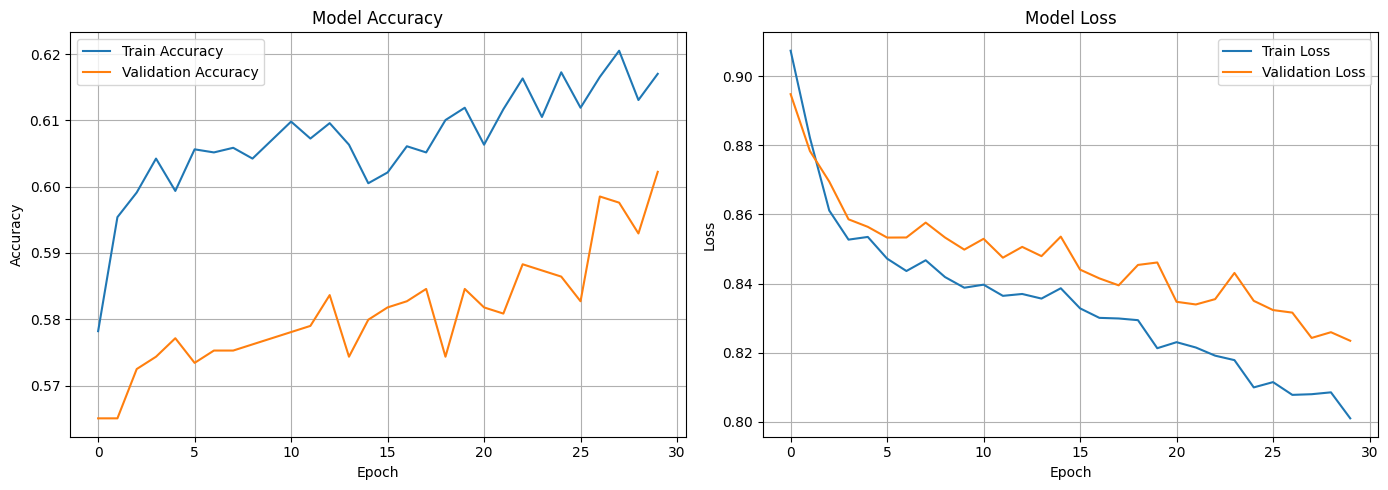

In [34]:
import matplotlib.pyplot as plt

# Replace 'history' with your model's history variable
def plot_accuracy_and_loss(history):
    plt.figure(figsize=(14, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Call this function after training
plot_accuracy_and_loss(history)


In [35]:
import numpy as np

# Convert one-hot encoded labels to class labels
y_test_dl_labels = np.argmax(y_test_dl, axis=1)

# Predict and convert to class labels
y_pred_probs = model.predict(X_test_dl)  # Replace `model` with actual variable name if different
y_pred_dl = np.argmax(y_pred_probs, axis=1)

# Plot confusion matrix
class_names = ['Fail', 'Pass', 'Distinction']
plot_confusion_matrix(y_test_dl_labels, y_pred_dl, class_names)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


NameError: name 'plot_confusion_matrix' is not defined

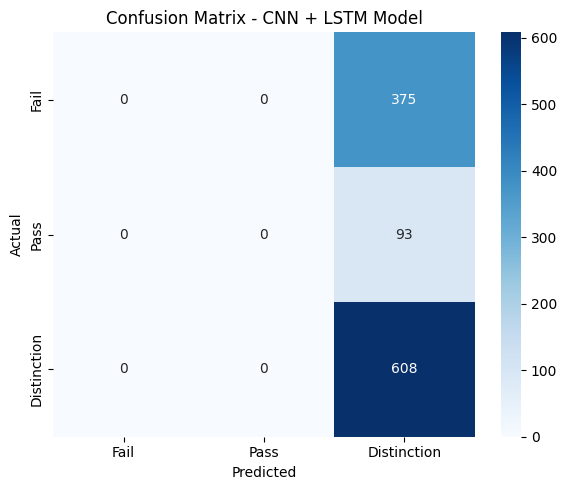


Classification Report Table:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
Fail,0.000000,0.000000,0.000000,375.000000
Pass,0.000000,0.000000,0.000000,93.000000
Distinction,0.565056,1.000000,0.722090,608.000000
accuracy,0.565056,0.565056,0.565056,0.565056
macro avg,0.188352,0.333333,0.240697,1076.000000
weighted avg,0.319288,0.565056,0.408021,1076.000000


<ipython-input-36-912e7ad29d51>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette='viridis')


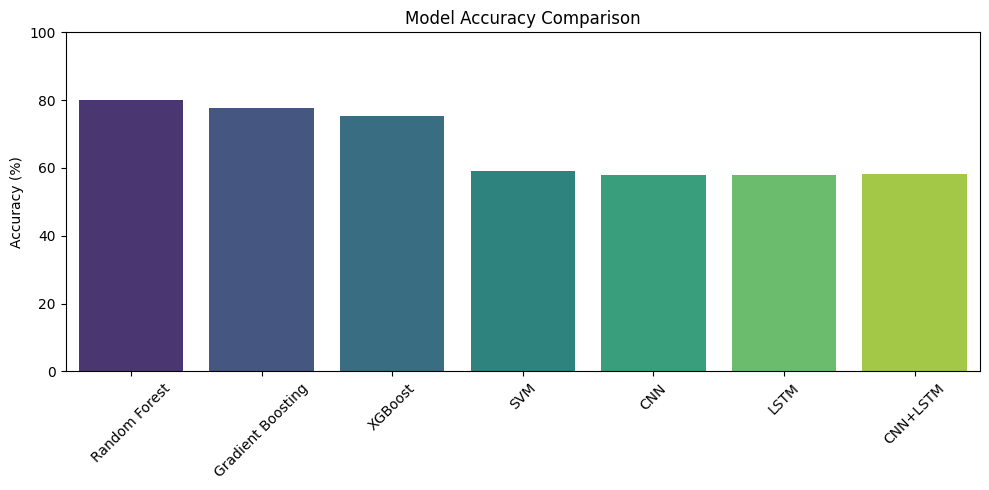

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# 1. Confusion Matrix Plot
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - CNN + LSTM Model')
    plt.tight_layout()
    plt.show()

# Example usage (already done):
# y_pred_dl = np.argmax(model_dl.predict(X_test_dl), axis=1)
# y_test_dl_labels = np.argmax(y_test_dl, axis=1)
class_names = ['Fail', 'Pass', 'Distinction']
plot_confusion_matrix(y_test_dl_labels, y_pred_dl, class_names)

# 2. Classification Report as Table
report = classification_report(y_test_dl_labels, y_pred_dl, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("\nClassification Report Table:")
display(report_df)

# 3. Accuracy Comparison of Models
model_accuracies = {
    'Random Forest': 80.02,
    'Gradient Boosting': 77.6,
    'XGBoost': 75.28,
    'SVM': 59.01,
    'CNN': 58.0,          # Replace with exact value from CNN-only
    'LSTM': 58.0,         # Replace with exact value from LSTM-only
    'CNN+LSTM': 58.36     # Replace with final value
}

plt.figure(figsize=(10, 5))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette='viridis')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


In [37]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate classification report dictionary
report_dict = classification_report(y_test_dl_labels, y_pred_dl, target_names=class_names, output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Display only relevant classes and metrics
report_df = report_df.iloc[:3, :3]  # Show only 3 classes and their precision/recall/f1
report_df = report_df.round(2)  # Round for presentation
report_df


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score
Fail,0.00,0.0,0.00
Pass,0.00,0.0,0.00
Distinction,0.57,1.0,0.72


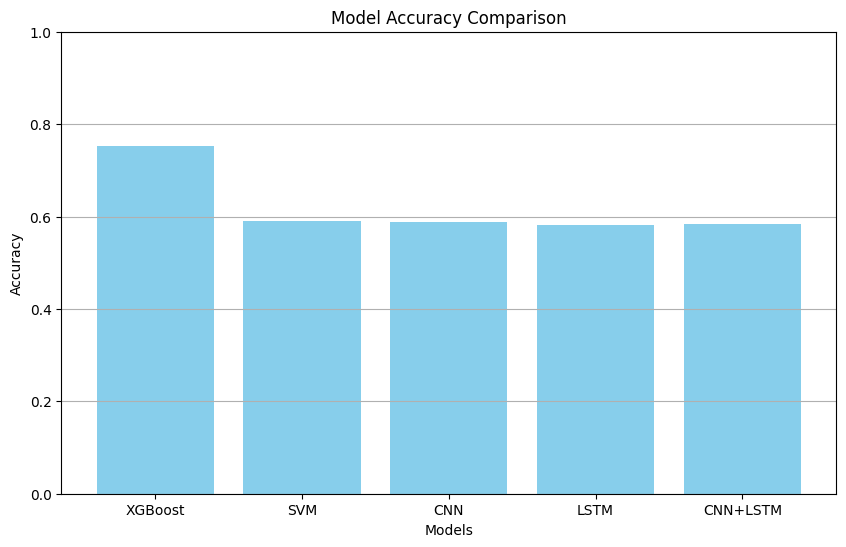

In [38]:
import matplotlib.pyplot as plt

# Replace these values with your actual model accuracies
model_names = ['XGBoost', 'SVM', 'CNN', 'LSTM', 'CNN+LSTM']
accuracies = [0.7528, 0.5901, 0.5892, 0.5809, 0.5836]  # Example values

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.grid(axis='y')
plt.show()


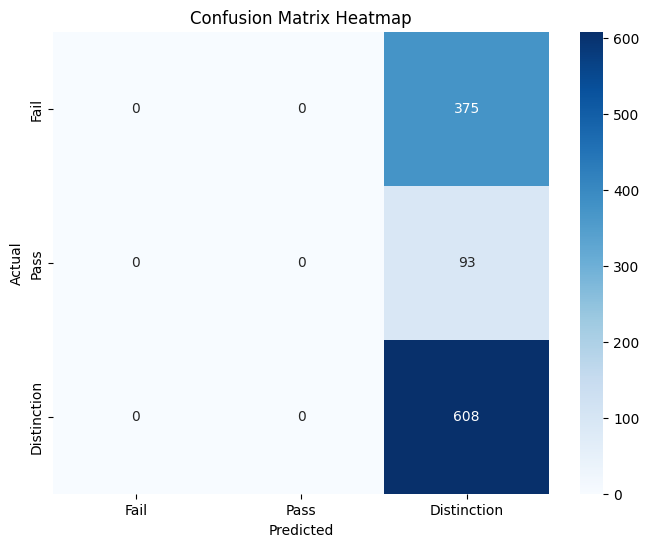

In [39]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_dl_labels, y_pred_dl)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix Heatmap')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


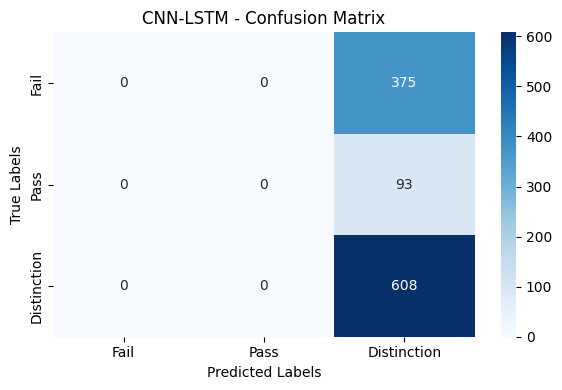

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, class_names, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.tight_layout()
    plt.show()

# Example usage
class_names = ['Fail', 'Pass', 'Distinction']
plot_confusion_matrix(y_test_dl_labels, y_pred_dl, class_names, "CNN-LSTM")


In [41]:
from sklearn.metrics import classification_report
import pandas as pd

# Classification Report for CNN-LSTM
report = classification_report(y_test_dl_labels, y_pred_dl, output_dict=True, target_names=class_names)
report_df = pd.DataFrame(report).transpose()
print(report_df)

# Optional: Save as CSV
# report_df.to_csv("cnn_lstm_classification_report.csv")


              precision    recall  f1-score      support
Fail           0.000000  0.000000  0.000000   375.000000
Pass           0.000000  0.000000  0.000000    93.000000
Distinction    0.565056  1.000000  0.722090   608.000000
accuracy       0.565056  0.565056  0.565056     0.565056
macro avg      0.188352  0.333333  0.240697  1076.000000
weighted avg   0.319288  0.565056  0.408021  1076.000000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<ipython-input-42-05c360d10f6a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


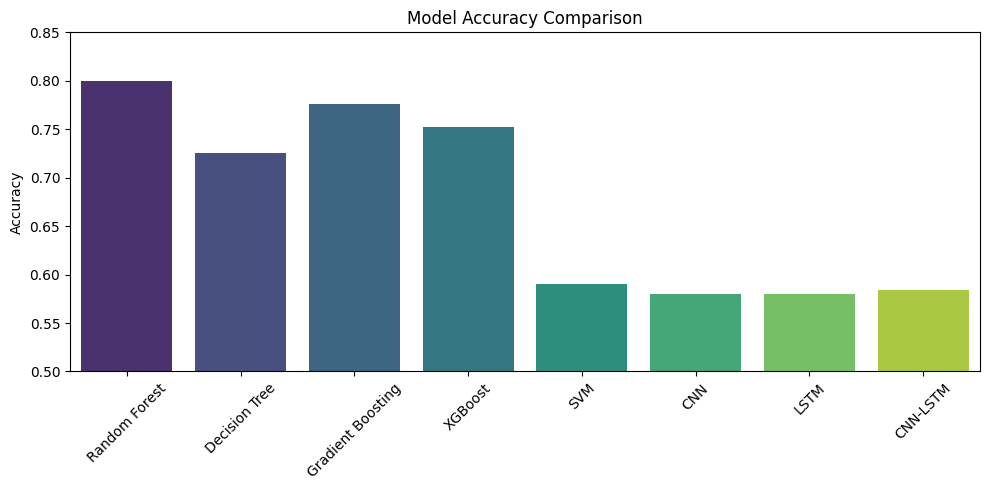

In [42]:
model_names = ['Random Forest', 'Decision Tree', 'Gradient Boosting', 'XGBoost', 'SVM', 'CNN', 'LSTM', 'CNN-LSTM']
accuracies = [0.8002, 0.725, 0.776, 0.7528, 0.5901, 0.58, 0.58, 0.5836]  # Example accuracies

plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.ylim(0.5, 0.85)
plt.title("Model Accuracy Comparison")
plt.tight_layout()
plt.show()


In [43]:
summary_data = {
    "Model": model_names,
    "Accuracy": accuracies,
    "Best For": [
        "Balanced overall",
        "Interpretable but overfits",
        "High accuracy",
        "Similar to GB but faster",
        "Weak performance",
        "Decent DL start",
        "Long-term dependencies",
        "Combines spatial & sequence"
    ]
}

summary_df = pd.DataFrame(summary_data)
print(summary_df)

# Optional: summary_df.to_csv("model_summary.csv", index=False)


               Model  Accuracy                     Best For
0      Random Forest    0.8002             Balanced overall
1      Decision Tree    0.7250   Interpretable but overfits
2  Gradient Boosting    0.7760                High accuracy
3            XGBoost    0.7528     Similar to GB but faster
4                SVM    0.5901             Weak performance
5                CNN    0.5800              Decent DL start
6               LSTM    0.5800       Long-term dependencies
7           CNN-LSTM    0.5836  Combines spatial & sequence
